In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

facebookad = pd.read_csv('C:/Users/lorin/Desktop/DA Course Homeworks/Chapter 5/facebook_ads_data.csv')
facebookad.head(
)


,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


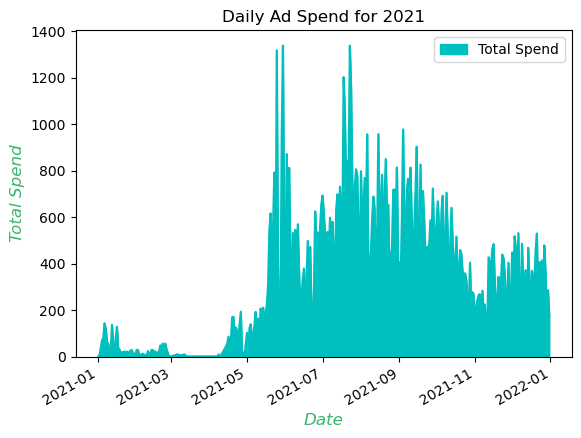

In [6]:
#Q1_1

facebookad['ad_date'] = pd.to_datetime(facebookad['ad_date'])

#Filter for days
facebookad_2021 = facebookad[facebookad['ad_date'].dt.year == 2021]

#Group By
daily_spend = facebookad_2021.groupby('ad_date', as_index=False)['total_spend'].sum()

#Plot
daily_spend.plot(x='ad_date', y='total_spend', kind='area', title='Daily Ad Spend for 2021', color='c', legend=True, label='Total Spend')
plt.xlabel('Date',fontsize='large', fontstyle='oblique', color='mediumseagreen')
plt.ylabel('Total Spend',fontsize='large', fontstyle='oblique', color='mediumseagreen')
plt.show()

C:\Users\lorin\AppData\Local\Temp\ipykernel_8712\2633403239.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebookad_2021['total_spend'] = facebookad_2021['cpc'] * facebookad_2021['total_clicks']


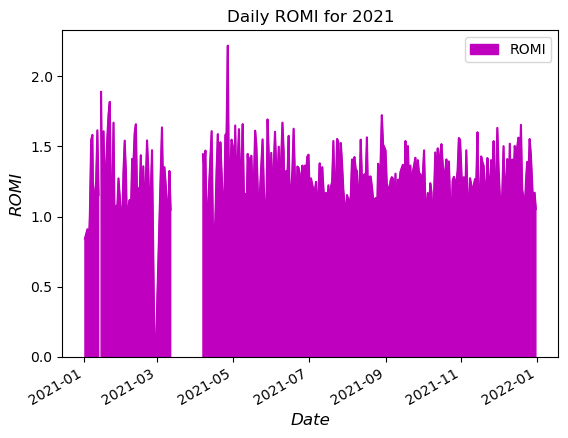

In [7]:
#Q1_2

# Load data
facebookad = pd.read_csv('C:/Users/lorin/Desktop/DA Course Homeworks/Chapter 5/facebook_ads_data.csv')

#Ensure 'ad_date' is in datetime format
facebookad['ad_date'] = pd.to_datetime(facebookad['ad_date'])

#Filter for 2021 data
facebookad_2021 = facebookad[facebookad['ad_date'].dt.year == 2021]

#Calculate total spend using CPC and total clicks
facebookad_2021['total_spend'] = facebookad_2021['cpc'] * facebookad_2021['total_clicks']

#Group by date and calculate total spend and total value
daily_data = facebookad_2021.groupby('ad_date', as_index=False).agg(
    total_value=('total_value', 'sum'),
    total_spend=('total_spend', 'sum')
)

#Calculate ROMI for each day
daily_data['romi'] = daily_data['total_value'] / daily_data['total_spend']

#Plot the daily ROMI
daily_data.plot(x='ad_date', y='romi', kind='area', title='Daily ROMI for 2021', color='m', legend=True, label='ROMI')
plt.xlabel('Date', fontsize='large', fontstyle='oblique', color='k')
plt.ylabel('ROMI', fontsize='large', fontstyle='oblique', color='k')
plt.show()

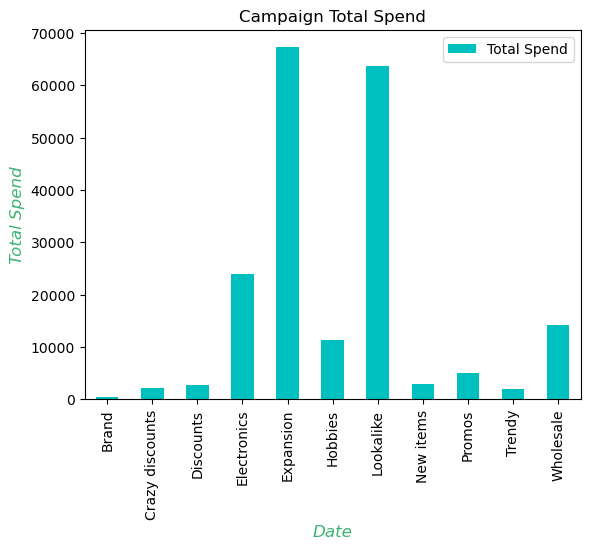

In [8]:
#Q2_1

#Group By
fb_camp = facebookad.groupby('campaign_name', as_index=False)['total_spend'].sum()

#Plot
fb_camp.plot(x='campaign_name', y='total_spend', kind='bar', title='Campaign Total Spend', color='c', legend=True, label='Total Spend')
plt.xlabel('Date',fontsize='large', fontstyle='oblique', color='mediumseagreen')
plt.ylabel('Total Spend',fontsize='large', fontstyle='oblique', color='mediumseagreen')
plt.show()

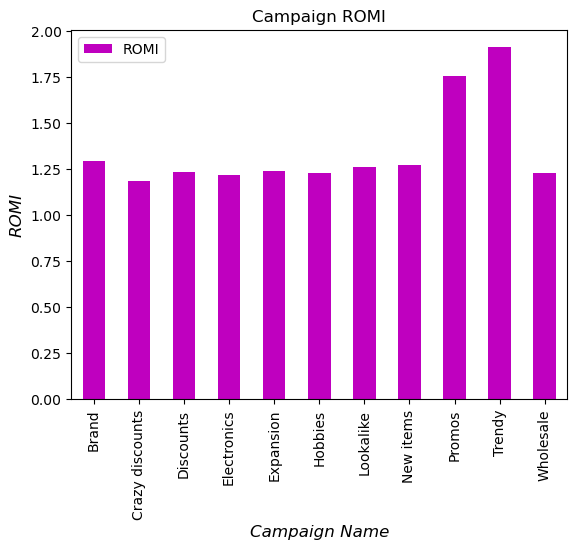

In [9]:
#Q2_2

facebookad['ad_date'] = pd.to_datetime(facebookad['ad_date'])

#Calculate total spend using CPC and total clicks for each campaign
facebookad['total_spend'] = facebookad['cpc'] * facebookad['total_clicks']

#Group by campaign_name and aggregate total spend and total_value
fb_camp = facebookad.groupby('campaign_name', as_index=False).agg(
    total_value=('total_value', 'sum'),
    total_spend=('total_spend', 'sum')
)

#Calculate ROMI for each campaign
fb_camp['romi'] = fb_camp['total_value'] / fb_camp['total_spend']

#Plot the total ROMI for each campaign
fb_camp.plot(x='campaign_name', y='romi', kind='bar', title='Campaign ROMI', color='m', legend=True, label='ROMI')
plt.xlabel('Campaign Name', fontsize='large', fontstyle='oblique', color='k')
plt.ylabel('ROMI', fontsize='large', fontstyle='oblique', color='k')
plt.show()

<Axes: xlabel='romi', ylabel='campaign_name'>

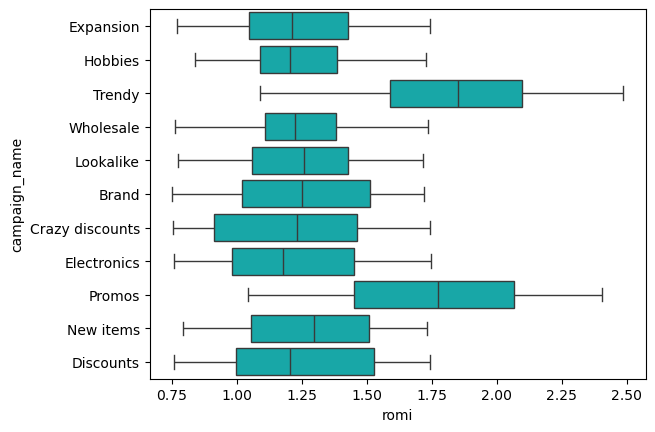

In [10]:
#Q3 Utilizând un box plot, determină distribuția ROMI-ului zilnic în fiecare campanie (după numele campaniei).
sns.boxplot(facebookad, x='romi', y='campaign_name', color='c')


<Axes: xlabel='romi', ylabel='Count'>

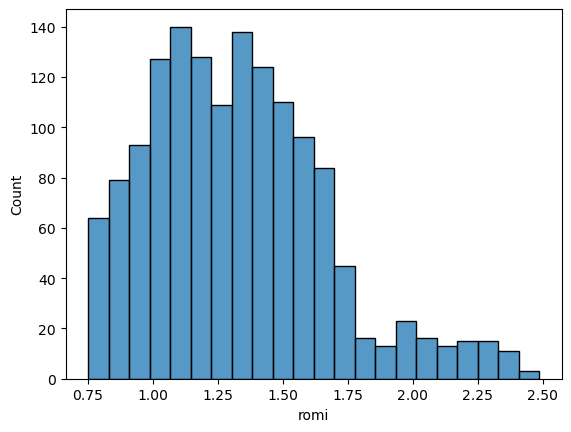

In [11]:
#Q4 Creează o histogramă cu distribuția valorilor ROMI din tabelul facebook_ads_data.csv.
sns.histplot(facebookad, x='romi')

In [12]:
#Q5 Creează un heat map a corelației între toți indicatorii numerici din tabelul facebook_ads_data.csv.
#Care indicatori au cea mai mare și cea mai mică corelație? Cu ce corelează “total_value”?
#A: Cea mai mare corelare la Spending este cu Veniturile
numerical_columns = facebookad.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
correlation_matrix


,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
total_spend,1.000000,0.468455,0.474291,0.978526,0.262220,0.482116,-0.033219,-0.114456
total_impressions,0.468455,1.000000,0.765489,0.472037,-0.093097,-0.121094,-0.155701,-0.099520
total_clicks,0.474291,0.765489,1.000000,0.472124,-0.159521,-0.032829,0.200440,-0.101495
total_value,0.978526,0.472037,0.472124,1.000000,0.250851,0.471338,-0.022267,-0.013733
cpc,0.262220,-0.093097,-0.159521,0.250851,1.000000,0.593732,-0.210719,-0.076911
cpm,0.482116,-0.121094,-0.032829,0.471338,0.593732,1.000000,0.116213,-0.062676
ctr,-0.033219,-0.155701,0.200440,-0.022267,-0.210719,0.116213,1.000000,-0.049992
romi,-0.114456,-0.099520,-0.101495,-0.013733,-0.076911,-0.062676,-0.049992,1.000000


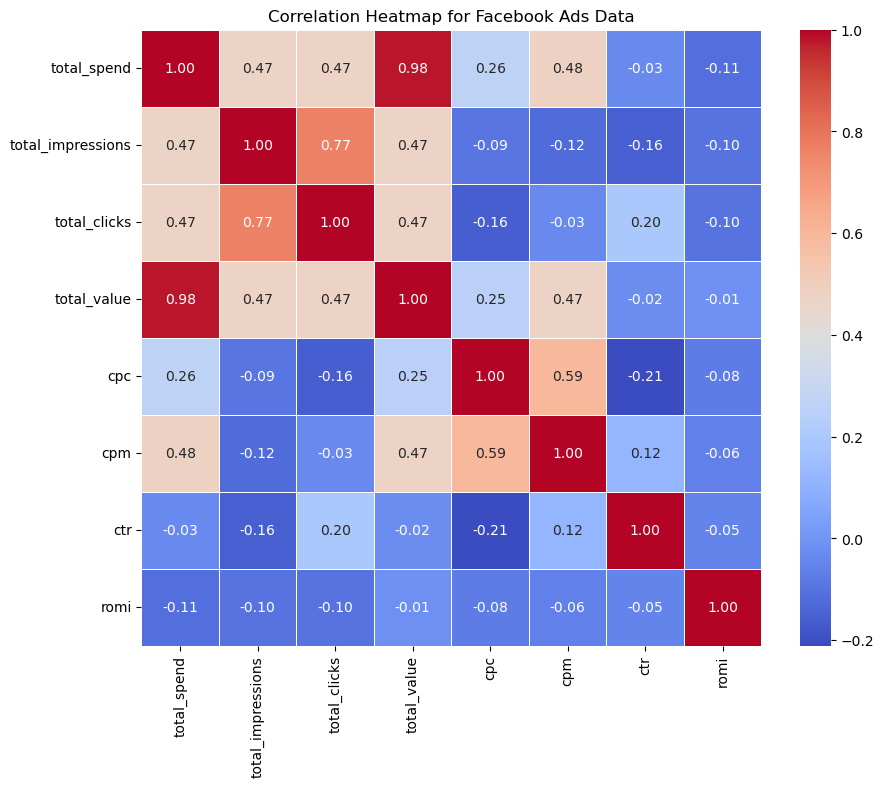

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure size
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and labels
plt.title('Correlation Heatmap for Facebook Ads Data')
plt.show()

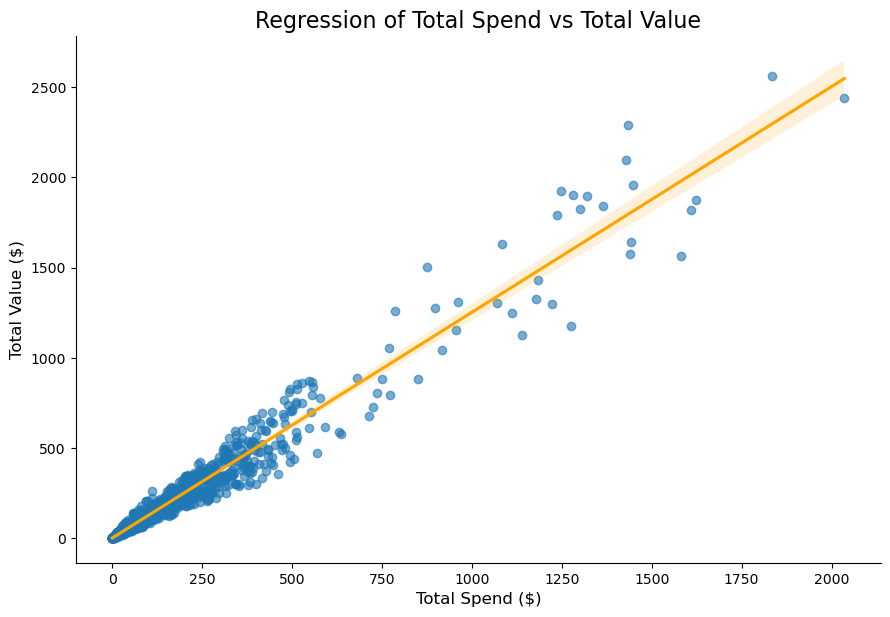

In [19]:
#Q6 Creează un grafic cu puncte cu regresie liniară (poți folosi funcția lmplot()),
#pe baza datelor din “total_spend” și “total_value” pentru a vizualiza relația dintre aceste variabile.

sns.lmplot(x='total_spend', y='total_value', data=facebookad, height=6, aspect=1.5, scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
plt.title('Regression of Total Spend vs Total Value', fontsize=16)
plt.xlabel('Total Spend ($)', fontsize=12)
plt.ylabel('Total Value ($)', fontsize=12)
plt.show()